In [ ]:
#checking validity of climate data

In [19]:
#libraries
import numpy as np
from netCDF4 import Dataset
import subprocess
from pathlib import Path
import matplotlib.pyplot as plt

In [20]:
file_path='/Users/jinyuntang/work/github/ecosim3/EcoSIM/examples/inputs/'
file_name='sample/sample_clim_200230202.nc'
file_name='lake/lake_clim_20230203.nc'
file_name='dryland_maize/dryland_clm_20230203.nc'

variable=TMPH,long_name=hourly air temperature,unit=oC
The shape of the 'TMPH' variable is: (6, 366, 24, 1)
variable=WINDH,long_name=horizontal wind speed,unit=m s^-1
The shape of the 'WINDH' variable is: (6, 366, 24, 1)
variable=RAINH,long_name=Total precipitation,unit=mm m^-2 hr^-1
The shape of the 'RAINH' variable is: (6, 366, 24, 1)
variable=DWPTH,long_name=atmospheric vapor pressure,unit=kPa
The shape of the 'DWPTH' variable is: (6, 366, 24, 1)
variable=SRADH,long_name=Incident solar radiation,unit=W m^-2
The shape of the 'SRADH' variable is: (6, 366, 24, 1)
variable=Z0G,long_name=windspeed measurement height,unit=m
The shape of the 'Z0G' variable is: (6, 1)
variable=ZNOONG,long_name=time of solar noon,unit=hour
The shape of the 'ZNOONG' variable is: (6, 1)
variable=CN4RIG,long_name=NH4 conc in precip,unit=gN m^-3
The shape of the 'CN4RIG' variable is: (6, 1)
variable=CNORIG,long_name=NO3 conc in precip,unit=gN m^-3
The shape of the 'CNORIG' variable is: (6, 1)
variable=CPORG,long

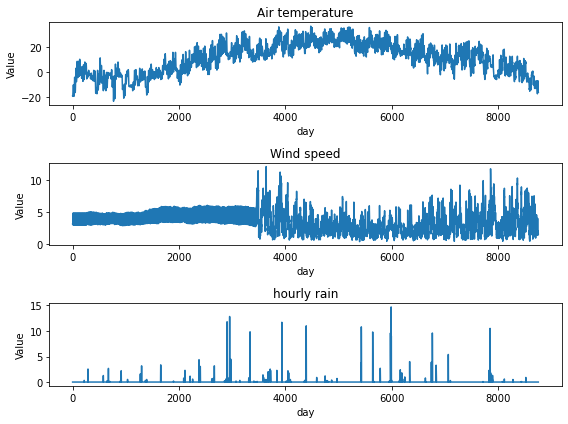

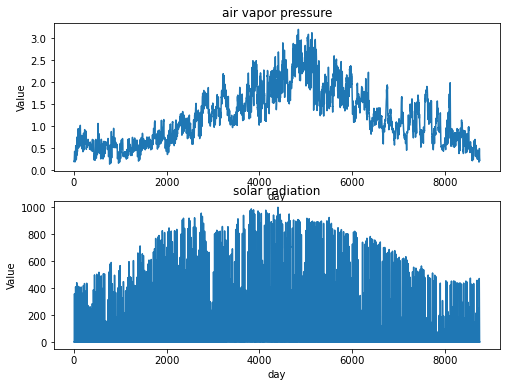

In [21]:
file_full=file_path+file_name

with Dataset(file_full, 'r+') as nc_file:
    for var_name in nc_file.variables:
        if hasattr(nc_file.variables[var_name], 'units'):
            print('variable=%s,long_name=%s,unit=%s'%(var_name,nc_file.variables[var_name].long_name,
                                                  nc_file.variables[var_name].units))
            var=nc_file.variables[var_name]
            print(f"The shape of the '{var_name}' variable is: {var.shape}")
    #hourly temperature    
    tmph=nc_file.variables['TMPH']
    #hourly wind speed
    windh=nc_file.variables['WINDH']
    #hourly rain
    rainh=nc_file.variables['RAINH']
    #hourly atmospheric vapor pressure
    dwpth=nc_file.variables['DWPTH']
    #hourly solar radiation 
    sradh=nc_file.variables['SRADH']
    
    #plot the variable
    fig, axs = plt.subplots(3, 1, figsize=(8, 6))
    temp=tmph[0,0:365,:,0].reshape(-1)
    axs[0].plot(temp)
    axs[0].set_xlabel('day')
    axs[0].set_ylabel('Value')
    axs[0].set_title('Air temperature')

    wind=windh[0,0:365,:,0].reshape(-1)
    axs[1].plot(wind)
    axs[1].set_xlabel('day')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Wind speed')

    rain=rainh[0,0:365,:,0].reshape(-1)
    print('total rain=%f mm/yr'%np.sum(rain))
    axs[2].plot(rain)
    axs[2].set_xlabel('day')
    axs[2].set_ylabel('Value')
    axs[2].set_title('hourly rain')
    # Adjust layout
    plt.tight_layout()
    plt.show()    
    
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))    
    dwpt=dwpth[0,0:365,:,0].reshape(-1)
    axs[0].plot(dwpt)
    axs[0].set_xlabel('day')
    axs[0].set_ylabel('Value')
    axs[0].set_title('air vapor pressure')
    
    srad=sradh[0,0:365,:,0].reshape(-1)
    axs[1].plot(srad)
    axs[1].set_xlabel('day')
    axs[1].set_ylabel('Value')
    axs[1].set_title('solar radiation')
        
